In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [29]:
import math

def otsu_thresh(img):
    best_t = 0
    min_var = math.inf
    total = len(img.ravel())
    
    print(total)
    
    total_vars = np.zeros((total))
    
    # assuming that iamge intensity values is between 0 to 255
    for t in range(255):
        part_1_idx = img < t
        part_2_idx = img >= t
        
        part_1 = img[part_1_idx]
        part_2 = img[part_2_idx]
        
        variance_1 = np.var(part_1.ravel()) if len(part_1) != 0 else 0
        variance_2 = np.var(part_2.ravel()) if len(part_2) != 0 else 0
        
        w1, w2 = len(part_1) / total, len(part_2) / total
        
        total_var = variance_1*w1 + variance_2*w2
        
        print(f't: {t} || w1: {w1} | w2: {w2} || var1 {variance_1} | var2 {variance_2}')
        print(f'total_var: {total_var}')
        print()
        
        total_vars[t] = total_var
        
        if total_var <= min_var:
            min_var = total_var
            best_t = t
    
    return t, total_vars

In [56]:
def otsu_multi_thresh(img):
    best_t1 = best_t2 = 0
    min_var = math.inf
    total = len(img.ravel())
    
    # assuming that iamge intensity values is between 0 to 255
    for t1 in range(255):
        for t2 in range(255):
            part_1_idx = img < t1
            part_2_idx = (t1 <= img) & (img < t2)
            part_3_idx = img >= t2

            part_1 = img[part_1_idx]
            part_2 = img[part_2_idx]
            part_3 = img[part_3_idx]

            variance_1 = np.var(part_1.ravel()) if len(part_1) != 0 else 0
            variance_2 = np.var(part_2.ravel()) if len(part_2) != 0 else 0
            variance_3 = np.var(part_3.ravel()) if len(part_3) != 0 else 0

            w1, w2, w3 = len(part_1) / total, len(part_2) / total, len(part_3) / total

            total_var = variance_1*w1 + variance_2*w2 + variance_3*w3

            if total_var <= min_var:
                min_var = total_var
                best_t1 = t1
                best_t2 = t2
    
    return (best_t1, best_t2)

In [15]:
c1 = cv2.cvtColor( cv2.imread('./coins_1.png'), cv2.COLOR_BGR2GRAY)

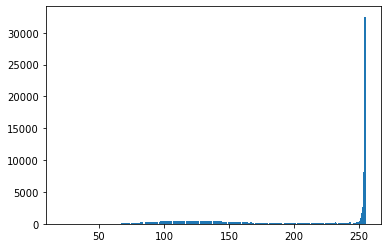

In [7]:
plt.hist(c1.ravel(), bins=256);

In [30]:
t, total_vars = otsu_thresh(c1)

89238
t: 0 || w1: 0.0 | w2: 1.0 || var1 0 | var2 4262.308819609304
total_var: 4262.308819609304

t: 1 || w1: 0.0 | w2: 1.0 || var1 0 | var2 4262.308819609304
total_var: 4262.308819609304

t: 2 || w1: 0.0 | w2: 1.0 || var1 0 | var2 4262.308819609304
total_var: 4262.308819609304

t: 3 || w1: 0.0 | w2: 1.0 || var1 0 | var2 4262.308819609304
total_var: 4262.308819609304

t: 4 || w1: 0.0 | w2: 1.0 || var1 0 | var2 4262.308819609304
total_var: 4262.308819609304

t: 5 || w1: 0.0 | w2: 1.0 || var1 0 | var2 4262.308819609304
total_var: 4262.308819609304

t: 6 || w1: 0.0 | w2: 1.0 || var1 0 | var2 4262.308819609304
total_var: 4262.308819609304

t: 7 || w1: 0.0 | w2: 1.0 || var1 0 | var2 4262.308819609304
total_var: 4262.308819609304

t: 8 || w1: 0.0 | w2: 1.0 || var1 0 | var2 4262.308819609304
total_var: 4262.308819609304

t: 9 || w1: 0.0 | w2: 1.0 || var1 0 | var2 4262.308819609304
total_var: 4262.308819609304

t: 10 || w1: 0.0 | w2: 1.0 || var1 0 | var2 4262.308819609304
total_var: 4262.308819

In [32]:
t

254

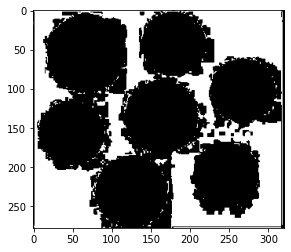

In [9]:
plt.gray()
plt.imshow(cv2.threshold(c1, t, 255, cv2.THRESH_BINARY)[1])

open cv best t: 187.0


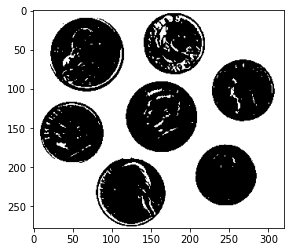

In [10]:
# comparing it w/ open cv's otsub


best_t, c1_otsu = cv2.threshold(c1, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print(f"open cv best t: {best_t}")

plt.imshow(c1_otsu)

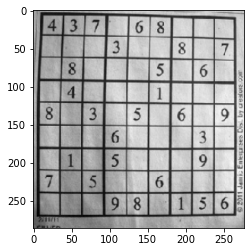

In [11]:
# trying another picture

sod_img = cv2.cvtColor( cv2.imread('../chap10/sod.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(sod_img)

mine otsu best t: 129


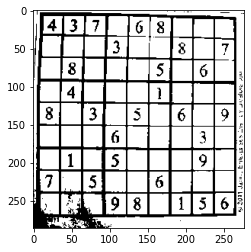

In [47]:
sod_t = otsu_thresh(sod_img)

print(f'mine otsu best t: {sod_t}')


plt.imshow(cv2.threshold(sod_img, sod_t, 255, cv2.THRESH_BINARY)[1])

In [ ]:
sod_best_t, sod_otsu = cv2.threshold(sod_img, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print(f'best t: {sod_best_t}')

plt.imshow(sod_otsu)

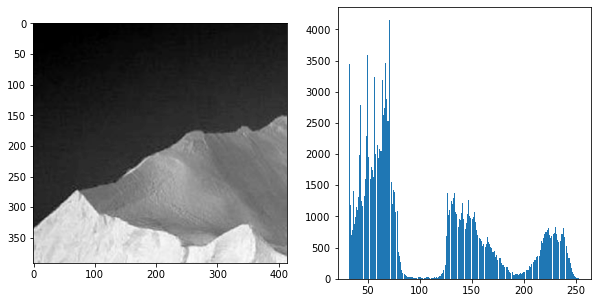

In [82]:
# multipl,e thresholding

def plot_img_and_hist(img):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    ax[0].imshow(img)
    ax[1].hist(img.ravel(), bins=256);

mount_img = cv2.cvtColor( cv2.imread('../chap10/mountain.png'), cv2.COLOR_BGR2GRAY)

plot_img_and_hist(mount_img)

In [70]:
t1, t2 = otsu_multi_thresh(mount_img)

In [71]:
print(f't1: {t1} | t2: {t2}')

t1: 103 | t2: 187


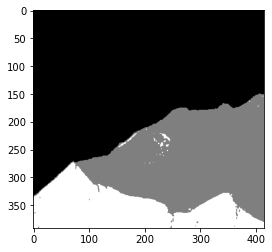

In [72]:
def multi_thresh(img, t1, t2):
    part_1_idx = img < t1
    part_2_idx = (t1 <= img) & (img < t2)
    part_3_idx = img >= t2

    img[part_1_idx] = 0
    img[part_2_idx] = 127
    img[part_3_idx] = 255
    
    return img

multi_thresh_img = multi_thresh(mount_img.copy(), t1, t2)
plt.imshow(multi_thresh_img)


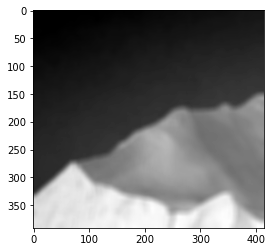

In [79]:
mount_img_blur = cv2.GaussianBlur(mount_img, (13,13), 51)
plt.imshow(mount_img_blur)

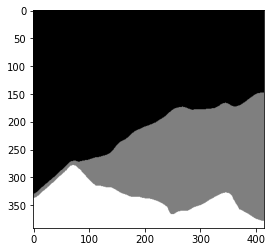

In [80]:
multi_thresh_img_blured = multi_thresh(mount_img_blur.copy(), t1, t2)
plt.imshow(multi_thresh_img_blured)